In [168]:
# Importing libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [88]:
data = {
    'job_title_short': ['Data Analyst', 'Data Scientist', 'Data Engineer'],
    'job_skills': [['excel', 'sql', 'python'], ['python', 'r'], ['aws', 'python', 'airflow']]
}

df_skills = pd.DataFrame(data)

df_skills

,job_title_short,job_skills
0,Data Analyst,"[excel, sql, python]"
1,Data Scientist,"[python, r]"
2,Data Engineer,"[aws, python, airflow]"


In [ ]:
df_skill_lists = df_skills.copy()

for row in df_skill_lists.itertuples():
    for skill in row.job_skills:
        df_skill_lists[skill] = df_skill_lists['job_skills'].apply(lambda x: skill in x)
        df_skill_lists[skill] = df_skill_lists[skill].astype(int)

df_skill_lists.loc['Total'] = df_skill_lists.sum()

df_skill_lists.iloc[:, 2:]

,job_title_short,job_skills
0,Data Analyst,"[excel, sql, python]"
1,Data Scientist,"[python, r]"
2,Data Engineer,"[aws, python, airflow]"


In [100]:
df_exploded = df_skills.explode('job_skills')

df_exploded

,job_title_short,job_skills
0,Data Analyst,excel
0,Data Analyst,sql
0,Data Analyst,python
1,Data Scientist,python
1,Data Scientist,r
2,Data Engineer,aws
2,Data Engineer,python
2,Data Engineer,airflow


In [101]:
df_exploded.value_counts('job_skills')

job_skills
python     3
airflow    1
aws        1
excel      1
r          1
sql        1
Name: count, dtype: int64

<Axes: xlabel='job_skills'>

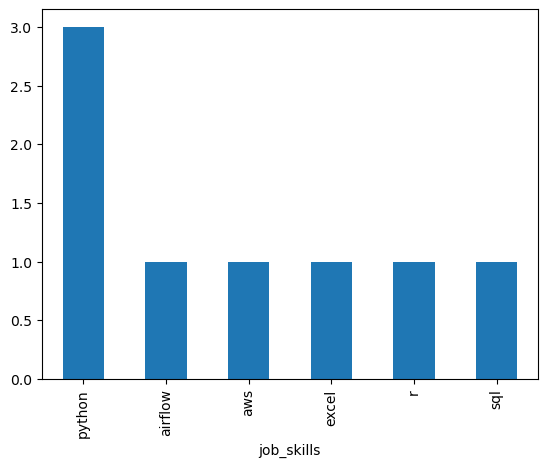

In [102]:
df_exploded.value_counts('job_skills').plot(kind='bar')

In [103]:
# Explode 'job_skills' so each skill gets its own row
df_exploded = df.explode('job_skills')

In [104]:
df_exploded['job_skills']

0               None
1                  r
1             python
1                sql
1              nosql
             ...    
785739         kafka
785739    kubernetes
785739        docker
785740           aws
785740          flow
Name: job_skills, Length: 3777320, dtype: object

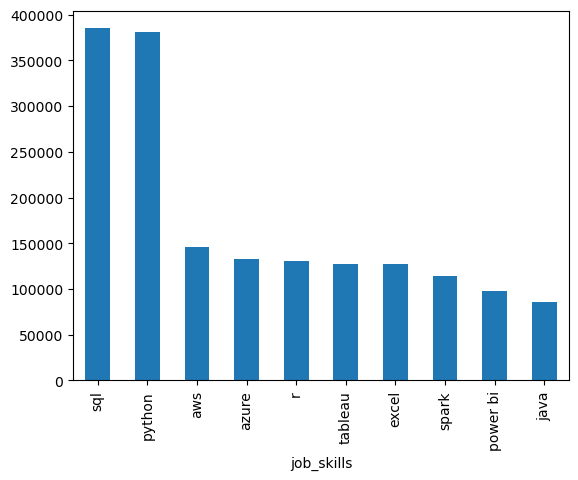

In [105]:
df_exploded['job_skills'].value_counts().head(10).plot(kind='bar')
plt.show()

In [106]:
# Explode job_skills column
df_skills = df_skills.explode('job_skills')

In [110]:
# Group by job_skills and job_title_short and count the number of ocurrences
skills_count = df_skills.groupby(['job_skills', 'job_title_short']).size()

print('Type of skills_count: ', type(skills_count))
skills_count

Type of skills_count:  <class 'pandas.core.series.Series'>


job_skills  job_title_short
airflow     Data Engineer      1
aws         Data Engineer      1
excel       Data Analyst       1
python      Data Analyst       1
            Data Engineer      1
            Data Scientist     1
r           Data Scientist     1
sql         Data Analyst       1
dtype: int64

In [112]:
# Name the count column as count
df_skills_count = skills_count.reset_index(name='skill_count') # We need to rename the main Series value to count

df_skills_count

,job_skills,job_title_short,skill_count
0,airflow,Data Engineer,1
1,aws,Data Engineer,1
2,excel,Data Analyst,1
3,python,Data Analyst,1
4,python,Data Engineer,1
5,python,Data Scientist,1
6,r,Data Scientist,1
7,sql,Data Analyst,1


In [113]:
df_skills_count.sort_values(by='skill_count', inplace=True)

df_skills_count

,job_skills,job_title_short,skill_count
0,airflow,Data Engineer,1
1,aws,Data Engineer,1
2,excel,Data Analyst,1
3,python,Data Analyst,1
4,python,Data Engineer,1
5,python,Data Scientist,1
6,r,Data Scientist,1
7,sql,Data Analyst,1


In [120]:
job_title = 'Data Engineer'
head_value = 15

df_skill_final = df_skills_count[df_skills_count['job_title_short'] == job_title].head(head_value)

df_skill_final

,job_skills,job_title_short,skill_count
0,airflow,Data Engineer,1
1,aws,Data Engineer,1
4,python,Data Engineer,1


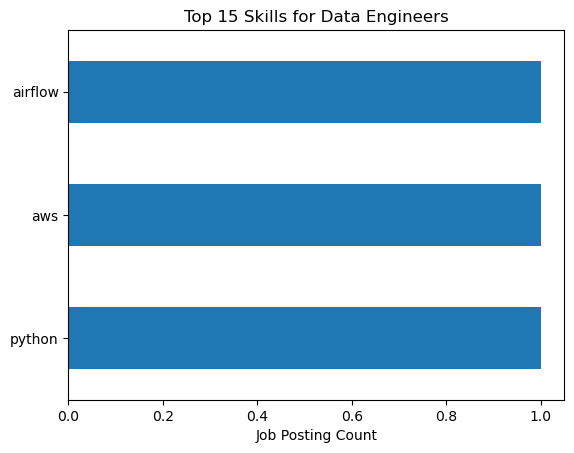

In [126]:
df_skill_final.plot(kind='barh', x='job_skills', y='skill_count')
plt.xlabel('Job Posting Count')
plt.ylabel('')
plt.title(f'Top {head_value} Skills for {job_title}s')
plt.gca().invert_yaxis() # To display the highest value on top
plt.legend().set_visible(False)
plt.show()

# Problems

In [176]:
# Bar Plot of Top Skills for Cloud Engineers
df_skills = df.explode('job_skills')
skills_count = df_skills.groupby(['job_skills', 'job_title_short']).size()
df_skills_count = skills_count.reset_index(name='skill_count')
df_skills_count.sort_values(by='skill_count', inplace=True, ascending=False)
df_skills_count

,job_skills,job_title_short,skill_count
1480,python,Data Scientist,113711
1822,sql,Data Engineer,113130
1479,python,Data Engineer,108022
1821,sql,Data Analyst,92428
1823,sql,Data Scientist,78982
...,...,...,...
2173,webex,Senior Data Scientist,1
1054,mattermost,Data Scientist,1
270,clickup,Machine Learning Engineer,1
797,heroku,Senior Data Analyst,1


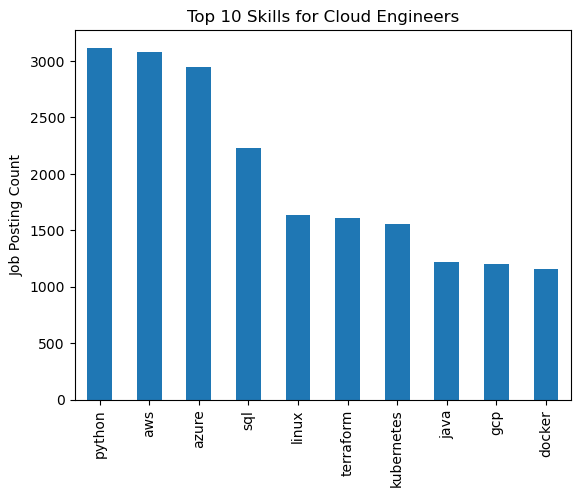

In [178]:
job_title = 'Cloud Engineer'
head_value = 10

df_skill_final = df_skills_count[df_skills_count['job_title_short'] == job_title].head(head_value)
df_skill_final.plot(kind='bar', x='job_skills', y='skill_count')
plt.xlabel('')
plt.ylabel('Job Posting Count')
plt.title(f'Top {head_value} Skills for {job_title}s')
plt.legend().set_visible(False)
plt.show()

In [161]:
# Average Salary by Skill
df_skills = df.explode('job_skills')
skills_salary = df_skills.groupby('job_skills')['salary_year_avg'].median()
df_skills_salary = skills_count.reset_index(name='avg_salary')
df_skills_salary.sort_values(by='avg_salary', inplace=True, ascending=False)
df_skills_salary = df_skills_salary.head(10)
df_skills_salary

,job_skills,avg_salary
46,debian,196500.0
177,ringcentral,182500.0
126,mongo,173500.0
114,lua,170500.0
240,watson,157500.0
54,dplyr,157500.0
89,haskell,157500.0
93,hugging face,157500.0
10,asp.net core,155000.0
198,solidity,152500.0


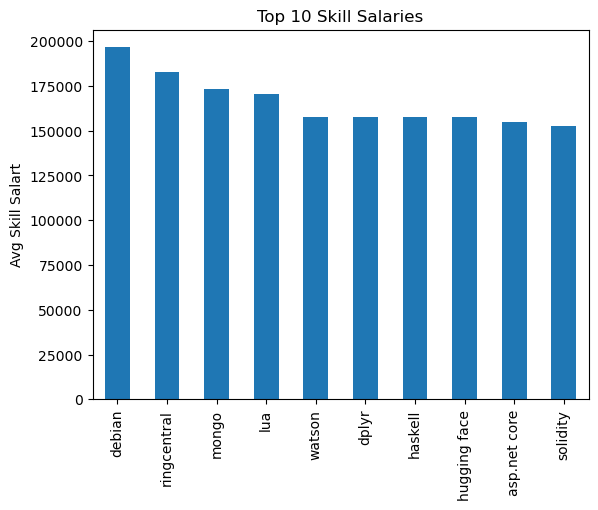

In [165]:
df_skills_salary.plot(kind='bar', x='job_skills', y='avg_salary')
plt.xlabel('')
plt.ylabel('Avg Skill Salart')
plt.title('Top 10 Skill Salaries')
plt.legend().set_visible(False)
plt.show()

In [185]:
# Unique Skills Count
df_exploded = df.explode('job_skills').copy()
df_exploded = df_exploded.groupby('job_skills').size()
df_exploded = df_exploded.reset_index(name='skill_count')
df_exploded.sort_values(by='skill_count', inplace=True, ascending=False)
df_exploded = df_exploded.head(10)
df_exploded

,job_skills,skill_count
204,sql,384849
167,python,380909
15,aws,145381
16,azure,132527
171,r,130892
217,tableau,127213
63,excel,127018
199,spark,114609
160,power bi,98147
97,java,85612


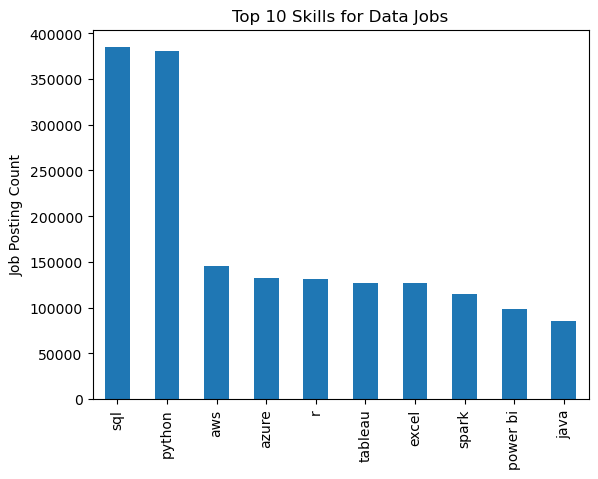

In [187]:
df_exploded.plot(kind='bar', x='job_skills', y='skill_count')
plt.xlabel('')
plt.ylabel('Job Posting Count')
plt.title('Top 10 Skills for Data Jobs')
plt.legend().set_visible(False)
plt.show()